# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Reading Data CSV File

In [2]:
# Reading Data From CSV File
data = pd.read_csv('BlackFriday.csv')

# Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# head Data Showing First 10 Rows From Data set..
## Here we can see that Product_Category_2 and Product_Category_3 has Null values

In [4]:
# First 10 Data points (Rows)
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# Matrix which describes features (numeric values data) 

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Data Cleansing

## Checking for null columns

In [6]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

## Null Columns

In [7]:
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index(['Product_Category_2', 'Product_Category_3'], dtype='object')


## Filling Null values with 0

In [8]:
data.fillna(value=0, inplace=True)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


# Exploratory Data Analysis (EDA)

In [9]:
data['Product_Category_2'] = data['Product_Category_2'].astype('int64')
data['Product_Category_3'] = data['Product_Category_3'].astype('int64')
data.sort_values('User_ID')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2,0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0,0,7871


## Gender Graph Without duplicates (User transactions)

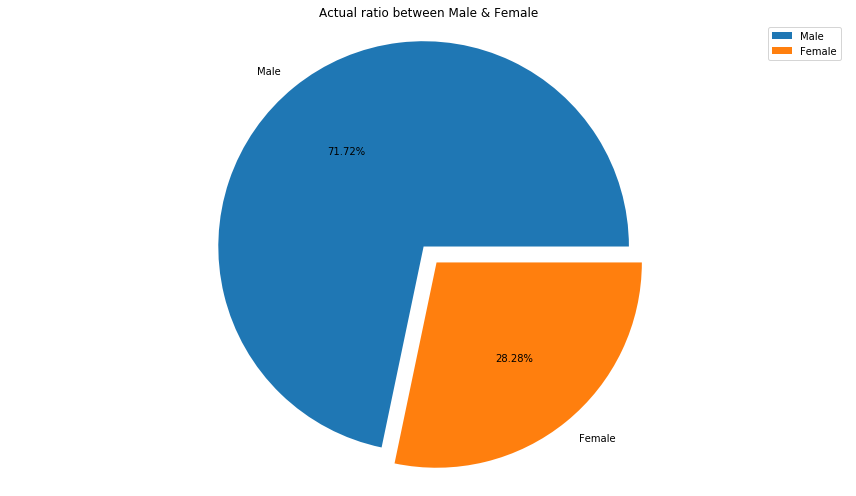

In [10]:
# Gender Pie Chart Without duplicates....
actualGender = data[['User_ID','Gender']].drop_duplicates('User_ID')
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(actualGender['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%',explode = (0.1,0))
plt.title("Actual ratio between Male & Female")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

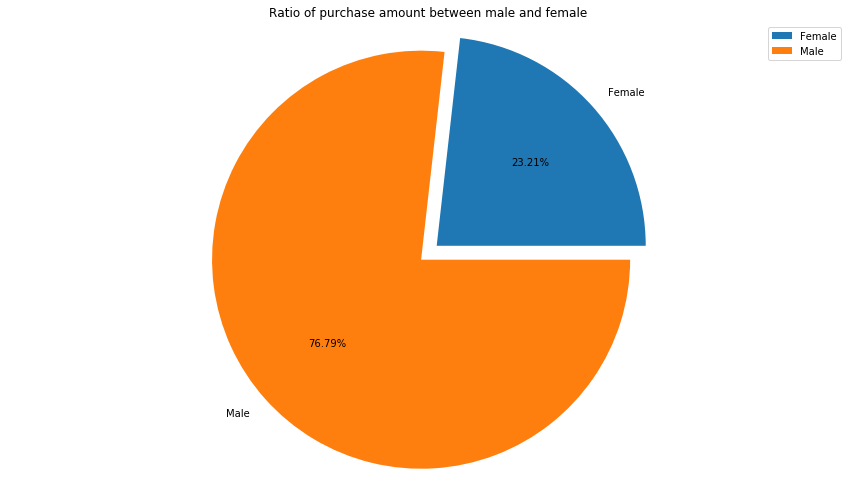

          Purchase
Gender            
F       1164624021
M       3853044357


In [11]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data[['Gender','Purchase']].groupby(by='Gender').sum(),labels=['Female','Male'],autopct='%1.2f%%',explode = (0.1,0))
plt.title("Ratio of purchase amount between male and female")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

print(data[['Gender','Purchase']].groupby(by='Gender').sum())

# Married Customers 2474
# Unmarried Customers 3417

In [12]:
u = data['User_ID'].groupby(data['Marital_Status']).nunique()
u

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

## Stay_In_Current_City_Years
### 0      772
### 1     2086
### 2     1145
### 3      979
### 4+     909

In [13]:
r = data['User_ID'].groupby(data['Stay_In_Current_City_Years']).nunique()
r

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [14]:
print('Unmarried ', len(data[data['Marital_Status'] == 0]))

Unmarried  317817


In [15]:
print('married ', len(data[data['Marital_Status'] == 1]))

married  219760


<class 'pandas.core.frame.DataFrame'>
     Age    Purchase
0   0-17   132659006
1  18-25   901669280
2  26-35  1999749106
3  36-45  1010649565
4  46-50   413418223
5  51-55   361908356
6    55+   197614842


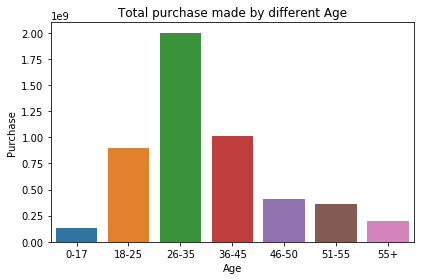

In [16]:
AgePurchase_DF = data[['Age','Purchase']].groupby('Age').sum().reset_index()
print(type(AgePurchase_DF))
print(AgePurchase_DF)
agePurchase = data.groupby(['Age', 'Purchase']).sum()
# print(agePurchase)
# print(AgePurchase_DF)
fig1,ax1 = plt.subplots()
sns.barplot(x='Age',y='Purchase',data=AgePurchase_DF)
plt.title('Total purchase made by different Age')
plt.tight_layout()

In [17]:
Customers = data['User_ID'].unique()
# for cust Customers:
    
# data.loc[data['User_ID'] == 1000001]

In [18]:
print('Hello')

Hello


In [19]:
gm = data.groupby('Marital_Status')

In [20]:
# for i, d1 in gm:
#     print(i)
#     print(d1)

In [21]:
# gm[0][0]

In [22]:
# gm[0].Age

In [23]:
mart = gm.get_group(0)

In [24]:
# Customers with age (0-17) not married
mart_d = mart[mart['Age'] == '0-17']
len(mart_d['Age'])

14707

In [25]:
type(mart[mart['Age'] == '0-17'].count())

pandas.core.series.Series

In [26]:
mart[mart['Age'] == '0-17'].count().value_counts

<bound method IndexOpsMixin.value_counts of User_ID                       14707
Product_ID                    14707
Gender                        14707
Age                           14707
Occupation                    14707
City_Category                 14707
Stay_In_Current_City_Years    14707
Marital_Status                14707
Product_Category_1            14707
Product_Category_2            14707
Product_Category_3            14707
Purchase                      14707
dtype: int64>

In [27]:
# Customers with age (18-25) not married
mart_d = mart[mart['Age'] == '18-25']
len(mart_d['Age'])

76993

In [28]:
# Customers with age (26-35) not married
mart_d = mart[mart['Age'] == '26-35']
len(mart_d['Age'])

130524

In [29]:
# Customers with age (36-45) not married
mart_d = mart[mart['Age'] == '36-45']
len(mart_d['Age'])

64992

In [30]:
# Customers with age (46-55) not married
mart_d = mart[mart['Age'] == '46-50']
len(mart_d['Age'])

12332

In [31]:
# Customers with age (51-55) not married
mart_d = mart[mart['Age'] == '51-55']
len(mart_d['Age'])

10639

In [32]:
# Customers with age (55+) not married
mart_d = mart[mart['Age'] == '55+']
len(mart_d['Age'])

7630

In [33]:
mr = data[data['Marital_Status'] == 0]
# mr
ageMarital_data = data[['Age','Marital_Status']].groupby('Marital_Status').count().reset_index()
# print(ageMarital_data.max())
print(ageMarital_data)
# ageMarital_data = mr[['Age','Marital_Status']].groupby('Age').count().reset_index()
# print(ageMarital_data)

   Marital_Status     Age
0               0  317817
1               1  219760


In [34]:
mr = data[data['Marital_Status'] == 0]
# mr
print('Age Groups who are unmarried')
ageMarital_data = mr[['Age','Marital_Status']].groupby('Age').count().reset_index()
print(ageMarital_data)
# print('Maximum Age Group UnMarried')
# print(ageMarital_data.max())
# print(ageMarital_data.describe())

Age Groups who are unmarried
     Age  Marital_Status
0   0-17           14707
1  18-25           76993
2  26-35          130524
3  36-45           64992
4  46-50           12332
5  51-55           10639
6    55+            7630


In [35]:
mr = data[data['Marital_Status'] == 1]
# mr
print('Age Groups who are married')
ageMarital_data = mr[['Age','Marital_Status']].groupby('Age').count().reset_index()
print(ageMarital_data)

Age Groups who are married
     Age  Marital_Status
0  18-25           20641
1  26-35           84166
2  36-45           42507
3  46-50           32194
4  51-55           26979
5    55+           13273


In [36]:
mr = data[data['Marital_Status'] == 1]
# mr
print('Age Groups who are married')
ageMarital_data = mr[['Age','Marital_Status']].groupby('Age').count().reset_index()
print(ageMarital_data)
# ageMarital_data.hist()

Age Groups who are married
     Age  Marital_Status
0  18-25           20641
1  26-35           84166
2  36-45           42507
3  46-50           32194
4  51-55           26979
5    55+           13273


In [37]:
g = mr[mr['Gender'] == 'F']
gage = g[['Gender', 'Age']].groupby('Age').count().reset_index()
gage

,Age,Gender
0,18-25,6117
1,26-35,19959
2,36-45,10115
3,46-50,9797
4,51-55,6150
5,55+,3085


In [38]:
g = mr[mr['Gender'] == 'M']
gage = g[['Gender', 'Age']].groupby('Age').count().reset_index()
gage

,Age,Gender
0,18-25,14524
1,26-35,64207
2,36-45,32392
3,46-50,22397
4,51-55,20829
5,55+,10188


In [39]:
mr

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0,0,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11,0,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,0,0,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,0,0,6073
13,1000005,P00145042,M,26-35,20,A,1,1,1,2,5,15665
18,1000007,P00036842,M,36-45,1,B,1,1,1,14,16,11788
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5,15,19614


In [40]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [41]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

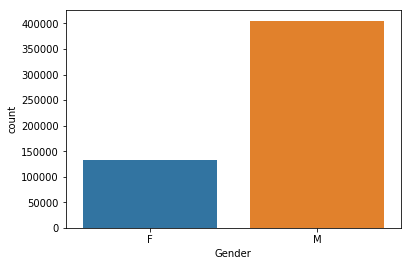

In [42]:
sns.countplot(data['Gender'])

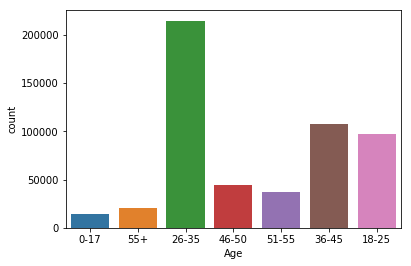

In [43]:
sns.countplot(data['Age'])

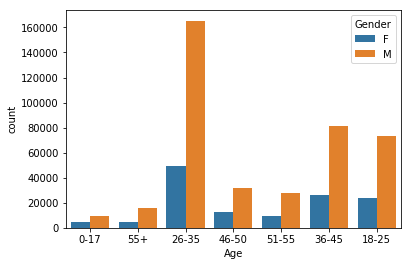

In [44]:
sns.countplot(data['Age'], hue=data['Gender'])

## This graph makes sense under 18 are not married

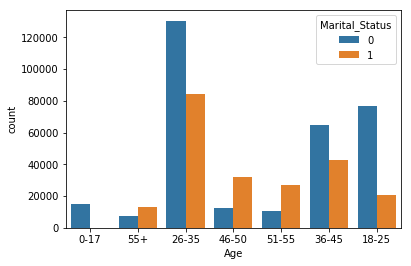

In [45]:
sns.countplot(data['Age'], hue=data['Marital_Status'])

In [46]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

# Analysing User_ID Feature
## not enough information from here, customer are buying stuff/products irrespective of age, gender or city.
## But Male is buying more than female which is not common on further study it shows that 26-35 married group so may be husbands are paying bills

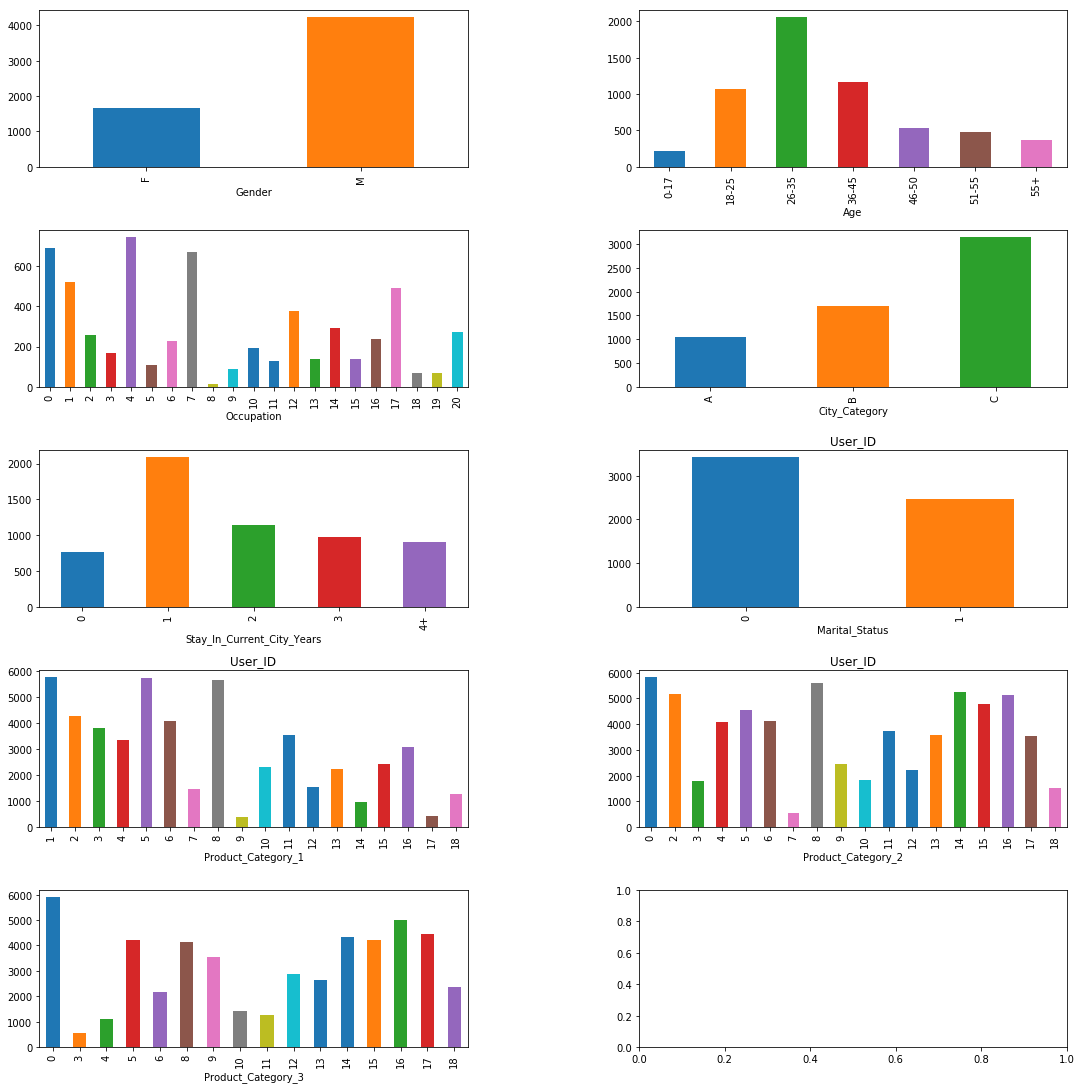

In [47]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)

data['User_ID'].groupby(data['Gender']).nunique().plot(kind='bar',ax=axes[0,0])
data['User_ID'].groupby(data['Age']).nunique().plot(kind='bar',ax=axes[0,1])
data['User_ID'].groupby(data['Occupation']).nunique().plot(kind='bar',ax=axes[1,0])
data['User_ID'].groupby(data['City_Category']).nunique().plot(kind='bar',ax=axes[1,1])
data['User_ID'].groupby(data['Stay_In_Current_City_Years']).nunique().plot(kind='bar',ax=axes[2,0])
data['User_ID'].groupby(data['Marital_Status']).nunique().plot(subplots=True,kind='bar',ax=axes[2,1])
data['User_ID'].groupby(data['Product_Category_1']).nunique().plot(subplots=True,kind='bar',ax=axes[3,0])
data['User_ID'].groupby(data['Product_Category_2']).nunique().plot(subplots=True,kind='bar',ax=axes[3,1])
data['User_ID'].groupby(data['Product_Category_3']).nunique().plot(kind='bar',ax=axes[4,0])

# Analysing Product_ID Feature
## Occupation 0 Customers bought more products

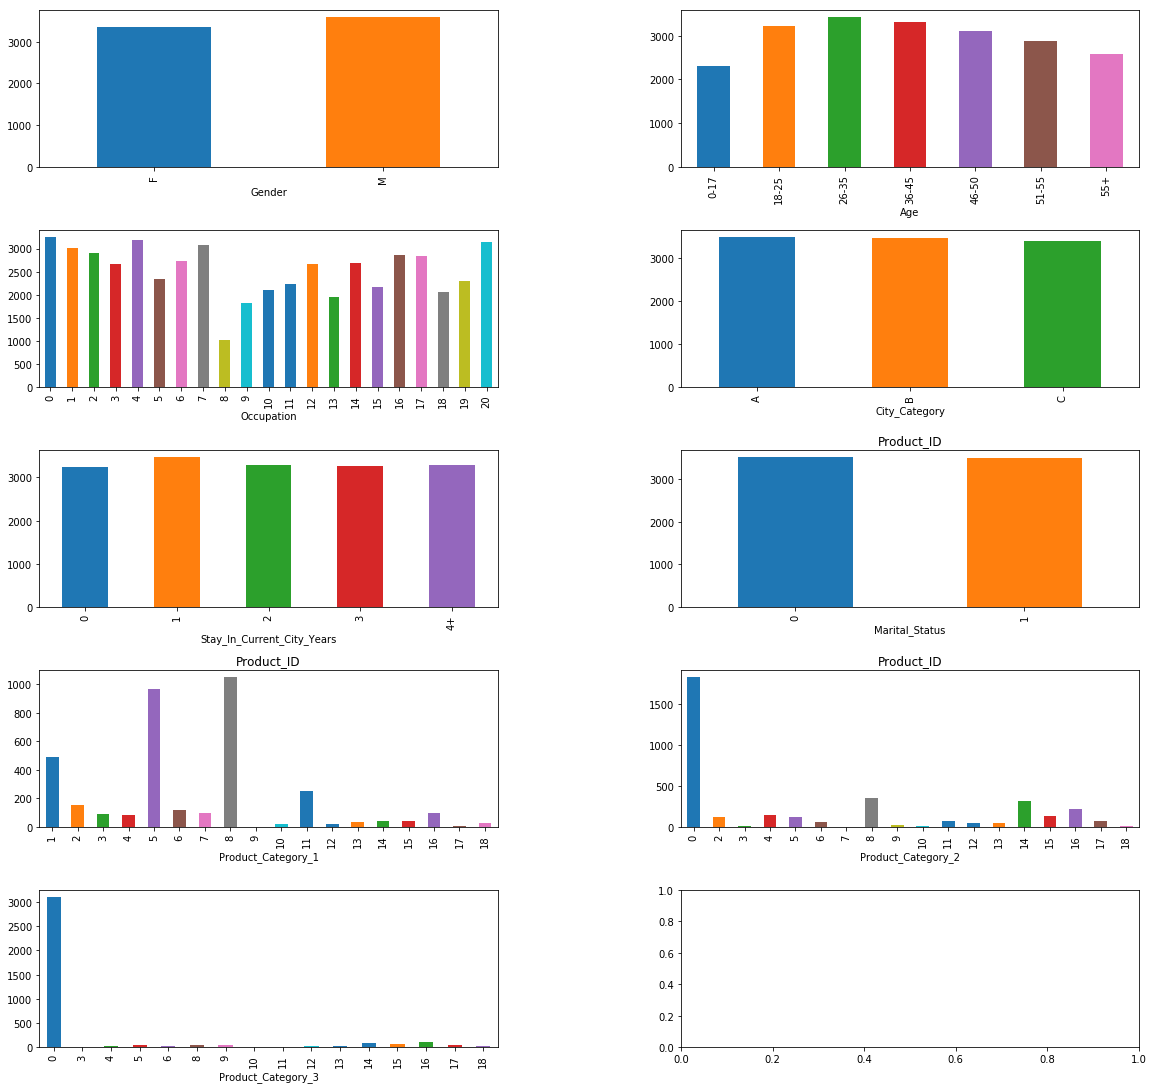

In [48]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(16,15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)

data['Product_ID'].groupby(data['Gender']).nunique().plot(kind='bar',ax=axes[0,0])
data['Product_ID'].groupby(data['Age']).nunique().plot(kind='bar',ax=axes[0,1])
data['Product_ID'].groupby(data['Occupation']).nunique().plot(kind='bar',ax=axes[1,0])
data['Product_ID'].groupby(data['City_Category']).nunique().plot(kind='bar',ax=axes[1,1])
data['Product_ID'].groupby(data['Stay_In_Current_City_Years']).nunique().plot(kind='bar',ax=axes[2,0])
data['Product_ID'].groupby(data['Marital_Status']).nunique().plot(subplots=True,kind='bar',ax=axes[2,1])
data['Product_ID'].groupby(data['Product_Category_1']).nunique().plot(subplots=True,kind='bar',ax=axes[3,0])
data['Product_ID'].groupby(data['Product_Category_2']).nunique().plot(subplots=True,kind='bar',ax=axes[3,1])
data['Product_ID'].groupby(data['Product_Category_3']).nunique().plot(kind='bar',ax=axes[4,0])

In [49]:
print(data['Product_ID'].groupby(data['Product_Category_3']).nunique())

Product_Category_3
0     3097
3        3
4       14
5       43
6       14
8       37
9       37
10       5
11       6
12      31
13      16
14      80
15      69
16     115
17      42
18      14
Name: Product_ID, dtype: int64


In [50]:
data['Product_ID'].groupby(data['Product_Category_2']).unique().count()

18

In [51]:
data['Product_ID'].groupby(data['Product_Category_1']).unique().count()

18

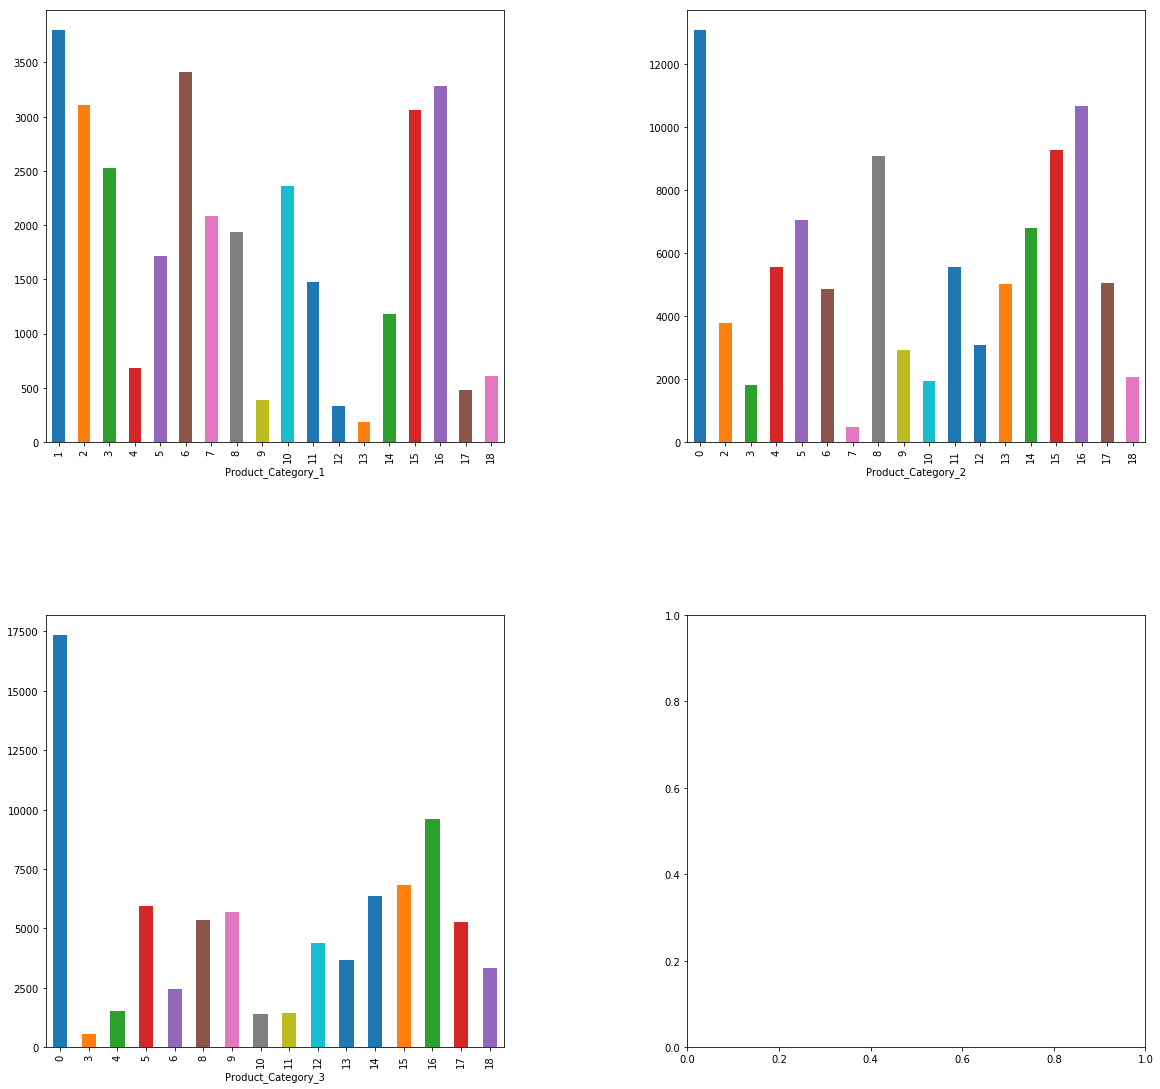

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)

data['Purchase'].groupby(data['Product_Category_1']).nunique().plot(kind='bar',ax=axes[0,0])
data['Purchase'].groupby(data['Product_Category_2']).nunique().plot(kind='bar',ax=axes[0,1])
data['Purchase'].groupby(data['Product_Category_3']).nunique().plot(kind='bar',ax=axes[1,0])

In [53]:
age_product_gb = data[['Age', 'Product_ID', 'Gender', 'Purchase']].groupby(['Age', 'Product_ID', 'Gender']).agg('count')
age_product_gb.sort_values('Purchase', inplace=True, ascending=False)
ages = sorted(data.Age.unique())
result = pd.DataFrame({
    x: list(age_product_gb.loc[x].index)[:5] for x in ages
}, index=['#{}'.format(x) for x in range(1,6)])
result

,0-17,18-25,26-35,36-45,46-50,51-55,55+
#1,"(P00112142, M)","(P00265242, M)","(P00265242, M)","(P00025442, M)","(P00046742, M)","(P00265242, M)","(P00265242, M)"
#2,"(P00237542, M)","(P00112142, M)","(P00110742, M)","(P00110742, M)","(P00265242, M)","(P00110742, M)","(P00080342, M)"
#3,"(P00255842, M)","(P00110742, M)","(P00112142, M)","(P00057642, M)","(P00117942, M)","(P00010742, M)","(P00025442, M)"
#4,"(P00145042, M)","(P00057642, M)","(P00057642, M)","(P00265242, M)","(P00025442, M)","(P00025442, M)","(P00051442, M)"
#5,"(P00025442, M)","(P00046742, M)","(P00025442, M)","(P00145042, M)","(P00112142, M)","(P00057642, M)","(P00059442, M)"


In [54]:
age_product_gb = data[['Age', 'Product_ID', 'Marital_Status', 'Purchase']].groupby(['Age', 'Product_ID', 'Marital_Status']).agg('count')
age_product_gb.sort_values('Purchase', inplace=True, ascending=False)
ages = sorted(data.Age.unique())
result = pd.DataFrame({
    x: list(age_product_gb.loc[x].index)[:5] for x in ages
}, index=['#{}'.format(x) for x in range(1,6)])
result

,0-17,18-25,26-35,36-45,46-50,51-55,55+
#1,"(P00255842, 0)","(P00265242, 0)","(P00265242, 0)","(P00025442, 0)","(P00265242, 1)","(P00265242, 1)","(P00265242, 1)"
#2,"(P00145042, 0)","(P00112142, 0)","(P00110742, 0)","(P00265242, 0)","(P00046742, 1)","(P00025442, 1)","(P00051442, 1)"
#3,"(P00112142, 0)","(P00110742, 0)","(P00025442, 0)","(P00110742, 0)","(P00051442, 1)","(P00110742, 1)","(P00080342, 1)"
#4,"(P00242742, 0)","(P00046742, 0)","(P00058042, 0)","(P00057642, 0)","(P00102642, 1)","(P00010742, 1)","(P00110542, 1)"
#5,"(P00034742, 0)","(P00237542, 0)","(P00237542, 0)","(P00112142, 0)","(P00117942, 1)","(P00220442, 1)","(P00184942, 1)"


In [55]:
age_product_gb = data[['Age', 'Product_ID', 'Marital_Status', 'Purchase']].groupby(['Age', 'Product_ID', 'Marital_Status'])
age_product_gb.first()

Purchase
Age  Product_ID Marital_Status          
0-17 P00000142  0                  10868
     P00000242  0                   9691
     P00000342  0                   8704
     P00000442  0                   5264
     P00000542  0                   7133
     P00000642  0                  15354
     P00000742  0                   6969
     P00000842  0                  10028
     P00000942  0                   4100
     P00001042  0                  11618
     P00001142  0                   5233
     P00001242  0                   6896
     P00001342  0                   2813
     P00001442  0                   6041
     P00001542  0                  12068
     P00001642  0                   7916
     P00001742  0                   9869
     P00001842  0                   8103
     P00001942  0                   8826
     P00002042  0                   7973
     P00002142  0                  19471
     P00002242  0                  16512
     P00002442  0                   7769
     P00002542  0                   8093
     P00002642  0                   6129
     P00002742  0                   9697
     P00002842  0                  18334
     P00002942  0                  16303
     P00003042  0                   6032
     P00003142  0                   6177
...                                  ...
55+  P0097442   1                   5867
     P0097742   0                   9713
                1                   5821
     P0097842   0                   6975
                1                   5465
     P0097942   0                   5881
                1                   4005
     P0098042   0                   7853
                1                   5913
     P0098242   0                  15336
                1                  11497
     P0098342   0                  15190
                1                  15420
     P0098442   0                  16539
                1                  12502
     P0098742   1                   7907
     P0098942   0                  10001
     P0099042   0                   5255
                1                   7164
     P0099242   0                   8064
                1                   6057
     P0099342   0                   5349
                1                   5466
     P0099442   0                  16287
                1                  16158
     P0099642   0                   3903
     P0099842   0                   7143
                1                   8891
     P0099942   0                   5356
                1                   5413

[35419 rows x 1 columns]

In [56]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [57]:
newData = data
newData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


# Encoding Categorical Variables
## just to show how encoding working created functions, it can be done with one line as well

In [58]:
def map_gender(gender):
    if gender == 'F':
        return 0
    else:
        return 1
newData['Gender'] = newData['Gender'].apply(map_gender)

In [59]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
newData['Age'] = newData['Age'].apply(map_age)

In [60]:
newData['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [61]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 0
    elif city_category == 'B':
        return 1
    else:
        return 2
newData['City_Category'] = newData['City_Category'].apply(map_city_categories)

In [62]:
newData['City_Category'].unique()

array([0, 2, 1])

In [63]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
newData['Stay_In_Current_City_Years'] = newData['Stay_In_Current_City_Years'].apply(map_stay)   

In [64]:
newData['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

# Correlation Matrix and Graph (Heat Map)
## Product_Category_1 and Product_Category_3 are reciprocal of each other negative correlation
## Product_Category_3 is important for puchase only that varible has good corr value for purchase
## Marital Staus and Age Correlation making our assumption thinking true

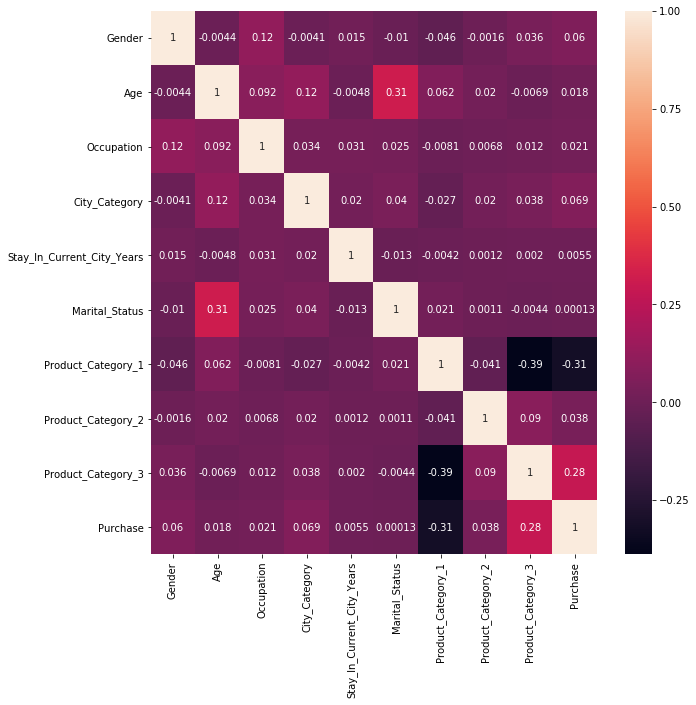

In [65]:
# fig,ax = plt.subplots(figsize = (12,9))
# sns.heatmap(newData.drop(['User_ID','Product_ID'],axis=1).corr())
d1 = newData.drop(['User_ID', 'Product_ID'], axis=1)
# newData.head()
corr_matrix = d1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True);
# sns.heatmap(corr_matrix, square=True);
plt.show()

In [66]:
# del newData
d1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969
5,1,2,15,0,3,0,1,2,0,15227
6,1,4,7,1,2,1,1,8,17,19215
7,1,4,7,1,2,1,1,15,0,15854
8,1,4,7,1,2,1,1,16,0,15686
9,1,2,20,0,1,1,8,0,0,7871


In [67]:
print(d1['Age'].unique())
print(d1['Gender'].unique())
print(d1['Stay_In_Current_City_Years'].unique())

[0 6 2 4 5 3 1]
[0 1]
[2 4 3 1 0]


In [68]:
from sklearn.model_selection import train_test_split
# X = d1.drop(['Purchase','Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2',
#              'Age', 'Marital_Status', 'Occupation', 'City_Category', 'Gender'],axis=1)
X = d1.drop(['Purchase', 'Product_Category_2'],axis=1)
# X = d1.drop(['Purchase'],axis=1)
X.info()
# df.reset_index()
Y = d1['Purchase']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_3            537577 non-null int64
dtypes: int64(8)
memory usage: 32.8 MB


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [70]:
X_train['Product_Category_3'].values

array([ 0,  0,  0, ...,  0,  0, 15])

# Normalizing Data (0-1)

In [71]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
nor = input('Normalize data ? press y for yes any letter for continue')
if(nor == 'y'):
    X_train = normalize(X_train)
    X_test  = normalize(X_test)

Normalize data ?0


In [72]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
# X_train

(430061, 8) (430061,)
(107516, 8) (107516,)


# Data Modeling

## Linear Regression Model

In [92]:
def linear_regression(X_train, Y_train, X_test, Y_test, X, Y):
    print('.............Running Linear Regression Model............')
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, Y_train)
    predictions = lm.predict(X_test)
    print('predicted values')
    print(predictions)
    print('actual values')
    print(np.array(d1.iloc[430062:537577].Purchase))
    print('Training data set score', model.score(X_train, Y_train))
    print('Test data set score', model.score(X_test, Y_test))
    yn = input("Want to apply KFold? press y for yes any letter to continue ")
    if(yn == 'y'):
        scores = cross_val_score(model, X, Y, cv=3)
        print("Cross-validated scores:", scores)
        print(scores.max())

## Training and test score 
## Even after normalizing the data set accuracy not increased

## Cross validation (Kfold by cross_val_score)

# Cross validation too not given great score
## Alternate Solution for that problem is RandomForest Model as normalizing encoding not worked

## RandomForest 

In [94]:
def random_forest(X_train, Y_train, X_test, Y_test, X, Y):
    print('.............Running RandomForest Model............')
    regr = RandomForestRegressor(max_depth=11,random_state=42,n_estimators=150)
    regr.fit(X_train,Y_train)
    rtest_score = regr.score(X_test,Y_test)
    rtrain_score = regr.score(X_train,Y_train)
    print('Test data set Score: ', rtest_score)
    print('Train data set Score: ', rtrain_score)
    yn = input("Want to apply KFold? press y for yes any letter to continue ")
    if(yn == 'y'):
        scores = cross_val_score(regr, X, Y, cv=3)
        print(scores)

## Cross validation (Kfold by cross_val_score)

# RandomForest Performing quite well than linear regression almost 70% accuracy reported, by changing some parameters

# KNN Algorithm for gender prediction with purchase and occupation

In [91]:
def knn():
    print('.............Running KNN Clasifier Model............')
    knn = KNeighborsClassifier(n_neighbors = 3)
    ds = data.copy()
    ds1 = ds[['Gender', 'Occupation', 'Purchase']]
    X1,Y1 = ds1.loc[:,ds1.columns != 'Gender'], ds1.loc[:,'Gender']
    X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size = 0.3, random_state = 5)
    knn.fit(X_train1,Y_train1)
    prediction = knn.predict(X_test1)
    print(Y_test1.unique())
    print(prediction)
    print('knn Test Data Score: ', knn.score(X_test1,Y_test1))
    print('knn Training Score: ', knn.score(X_train1, Y_train1))
    yn = input('you want check best K ? press y for yes any letter to continue ')
    if(yn == '1'):
        n = np.arange(1,30)
        train_accuracy = []
        test_accuracy = []
        inertias = []
        for i, k in enumerate (n):
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(X_train1,Y_train1)
            train_accuracy.append(knn.score(X_train1,Y_train1))
            test_accuracy.append(knn.score(X_test1,Y_test1))

        # Plot
        plt.figure(figsize=(13,8))
        plt.plot(n, test_accuracy, label = 'Testing Accuracy')
        plt.plot(n, train_accuracy, label = 'Training Accuracy')
        plt.legend()
        plt.title('-value vs. Accuracy')
        plt.xlabel('Number of Neighbors')
        plt.ylabel('Accuracy')
        plt.xticks(n)
        plt.show()
        i = 1 + test_accuracy.index(np.max(test_accuracy))
        print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),i))
        print('Training Accuray: {}'.format(train_accuracy[i]))

# KNN Accuracy (K = 3)
## Training Data Set 78
## Testing Data Set 70
## KNN performing good

## Searching for Best K with range (1, n)

# Best Test Accuracy is 0.751361037737019 with K = 27 (75.1 percent)
# Accuracy of Training set  is 0.75616 (75.6 percent)

In [93]:
q = 'n'
while q != 'y':
    n = input('Enter choice: press 1 for linear, 2 for random forest any for knn ')
    if(n == '1'):
        linear_regression(X_train, Y_train, X_test, Y_test, X, Y)
    elif(n == '2'):
        random_forest(X_train, Y_train, X_test, Y_test, X, Y)
    else:
        knn()
    q = input('You want to exit ? press y for yes any letter to continue... ')

Enter choice: press 1 for linear, 2 for random forest any for knn 5
.............Running KNN Clasifier Model............
[0 1]
[1 1 1 ... 1 0 0]
knn Test Data Score:  0.700608901620844
knn Training Score:  0.7884258164298451
you want check best K ? press y for yes any letter to continue 0
You want to exit ? press y for yes any letter to continue... y


In [ ]:
# linear_regression(X_train, Y_train, X_test, Y_test, X, Y)
# random_forest(X_train, Y_train, X_test, Y_test, X, Y)
# knn()